In [1]:
#data loading
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Cleaned_dataset.csv')
print(df.head())

  Date_of_journey Journey_day    Airline Flight_code    Class Source  \
0      2023-01-16      Monday   SpiceJet     SG-8169  Economy  Delhi   
1      2023-01-16      Monday     Indigo     6E-2519  Economy  Delhi   
2      2023-01-16      Monday   GO FIRST      G8-354  Economy  Delhi   
3      2023-01-16      Monday   SpiceJet     SG-8709  Economy  Delhi   
4      2023-01-16      Monday  Air India      AI-805  Economy  Delhi   

    Departure Total_stops      Arrival Destination  Duration_in_hours  \
0  After 6 PM    non-stop   After 6 PM      Mumbai             2.0833   
1  After 6 PM    non-stop  Before 6 AM      Mumbai             2.3333   
2  After 6 PM    non-stop  Before 6 AM      Mumbai             2.1667   
3  After 6 PM    non-stop   After 6 PM      Mumbai             2.0833   
4  After 6 PM    non-stop   After 6 PM      Mumbai             2.1667   

   Days_left  Fare  
0          1  5335  
1          1  5899  
2          1  5801  
3          1  5794  
4          1  5955  


In [2]:
#understanding data features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_of_journey    452088 non-null  object 
 1   Journey_day        452088 non-null  object 
 2   Airline            452088 non-null  object 
 3   Flight_code        452088 non-null  object 
 4   Class              452088 non-null  object 
 5   Source             452088 non-null  object 
 6   Departure          452088 non-null  object 
 7   Total_stops        452088 non-null  object 
 8   Arrival            452088 non-null  object 
 9   Destination        452088 non-null  object 
 10  Duration_in_hours  452088 non-null  float64
 11  Days_left          452088 non-null  int64  
 12  Fare               452088 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 44.8+ MB


In [3]:
#split dates into year, month and day columns
df['Date_of_journey'] = pd.to_datetime(df['Date_of_journey'])
df['Year'] = df['Date_of_journey'].dt.year
df['Month'] = df['Date_of_journey'].dt.month
df['Day'] = df['Date_of_journey'].dt.day

print(df.head())

  Date_of_journey Journey_day    Airline Flight_code    Class Source  \
0      2023-01-16      Monday   SpiceJet     SG-8169  Economy  Delhi   
1      2023-01-16      Monday     Indigo     6E-2519  Economy  Delhi   
2      2023-01-16      Monday   GO FIRST      G8-354  Economy  Delhi   
3      2023-01-16      Monday   SpiceJet     SG-8709  Economy  Delhi   
4      2023-01-16      Monday  Air India      AI-805  Economy  Delhi   

    Departure Total_stops      Arrival Destination  Duration_in_hours  \
0  After 6 PM    non-stop   After 6 PM      Mumbai             2.0833   
1  After 6 PM    non-stop  Before 6 AM      Mumbai             2.3333   
2  After 6 PM    non-stop  Before 6 AM      Mumbai             2.1667   
3  After 6 PM    non-stop   After 6 PM      Mumbai             2.0833   
4  After 6 PM    non-stop   After 6 PM      Mumbai             2.1667   

   Days_left  Fare  Year  Month  Day  
0          1  5335  2023      1   16  
1          1  5899  2023      1   16  
2          

In [4]:
df['Fare'].describe()

count    452088.000000
mean      22840.100890
std       20307.963002
min        1307.000000
25%        8762.750000
50%       13407.000000
75%       35587.000000
max      143019.000000
Name: Fare, dtype: float64

In [5]:
#check for duplicates
columns = ['Date_of_journey', 'Airline','Flight_code', 'Class', 'Source', 'Departure', 'Arrival', 'Destination', 'Duration_in_hours','Days_left', 'Fare']
duplicates = df.duplicated(subset = columns, keep = False)
df[duplicates].sort_values(by = 'Date_of_journey')

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Year,Month,Day
19210,2023-01-16,Monday,Vistara,UK-627,Economy,Delhi,12 PM - 6 PM,2+-stop,After 6 PM,Bangalore,29.9167,1,11117,2023,1,16
129022,2023-01-16,Monday,Vistara,UK-853,Premium Economy,Mumbai,12 PM - 6 PM,2+-stop,6 AM - 12 PM,Kolkata,17.5833,1,20792,2023,1,16
129023,2023-01-16,Monday,Vistara,UK-853,Premium Economy,Mumbai,12 PM - 6 PM,2+-stop,6 AM - 12 PM,Kolkata,17.5833,1,20792,2023,1,16
129024,2023-01-16,Monday,Vistara,UK-853,Premium Economy,Mumbai,12 PM - 6 PM,2+-stop,6 AM - 12 PM,Kolkata,17.5833,1,20792,2023,1,16
129025,2023-01-16,Monday,Vistara,UK-853,Premium Economy,Mumbai,12 PM - 6 PM,2+-stop,After 6 PM,Kolkata,26.0833,1,20792,2023,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415131,2023-03-06,Monday,Vistara,UK-918,Premium Economy,Ahmedabad,Before 6 AM,1-stop,After 6 PM,Delhi,17.2500,50,13911,2023,3,6
415132,2023-03-06,Monday,Vistara,UK-918,Premium Economy,Ahmedabad,Before 6 AM,1-stop,After 6 PM,Delhi,17.2500,50,13911,2023,3,6
153847,2023-03-06,Monday,Vistara,UK-625,Premium Economy,Mumbai,6 AM - 12 PM,2+-stop,After 6 PM,Chennai,12.1667,50,16106,2023,3,6
337936,2023-03-06,Monday,Vistara,UK-772,Economy,Kolkata,6 AM - 12 PM,1-stop,After 6 PM,Hyderabad,33.5833,50,11688,2023,3,6


In [6]:
#drop duplicates
df2 = df.drop_duplicates(subset=columns, keep='first')
print(df2.head(10))

  Date_of_journey Journey_day    Airline Flight_code    Class Source  \
0      2023-01-16      Monday   SpiceJet     SG-8169  Economy  Delhi   
1      2023-01-16      Monday     Indigo     6E-2519  Economy  Delhi   
2      2023-01-16      Monday   GO FIRST      G8-354  Economy  Delhi   
3      2023-01-16      Monday   SpiceJet     SG-8709  Economy  Delhi   
4      2023-01-16      Monday  Air India      AI-805  Economy  Delhi   
5      2023-01-16      Monday  Air India      AI-605  Economy  Delhi   
6      2023-01-16      Monday  Air India      AI-814  Economy  Delhi   
7      2023-01-16      Monday   GO FIRST      G8-330  Economy  Delhi   
8      2023-01-16      Monday   SpiceJet     SG-2976  Economy  Delhi   
9      2023-01-16      Monday   GO FIRST      G8-346  Economy  Delhi   

    Departure Total_stops       Arrival Destination  Duration_in_hours  \
0  After 6 PM    non-stop    After 6 PM      Mumbai             2.0833   
1  After 6 PM    non-stop   Before 6 AM      Mumbai        

In [7]:
df2['Fare'].describe()

count    445366.000000
mean      22919.747165
std       20394.214040
min        1307.000000
25%        8712.000000
50%       13362.000000
75%       36980.000000
max      143019.000000
Name: Fare, dtype: float64

In [8]:
df_destination_fares = df2.groupby('Destination')['Fare'].mean()
print(df_destination_fares)

Destination
Ahmedabad    21447.474878
Bangalore    22898.637920
Chennai      23747.487242
Delhi        21049.014735
Hyderabad    22011.878057
Kolkata      25269.254503
Mumbai       24042.408901
Name: Fare, dtype: float64


In [9]:
df_destination_duration = df2.groupby('Destination')['Duration_in_hours'].mean()
print(df_destination_duration)

Destination
Ahmedabad    13.161519
Bangalore    11.929191
Chennai      13.120642
Delhi        10.819426
Hyderabad    12.731954
Kolkata      13.354535
Mumbai       11.331538
Name: Duration_in_hours, dtype: float64


In [10]:
df_destination_days = df2.groupby('Destination')['Days_left'].mean()
print(df_destination_days)

Destination
Ahmedabad    25.579898
Bangalore    25.526249
Chennai      25.868489
Delhi        24.912752
Hyderabad    26.147454
Kolkata      25.425456
Mumbai       25.930921
Name: Days_left, dtype: float64


In [11]:
#check columns for categorical values
df2['Departure'].value_counts()

Departure
6 AM - 12 PM    181019
After 6 PM      126749
12 PM - 6 PM    114743
Before 6 AM      22855
Name: count, dtype: int64

In [12]:
df2['Arrival'].value_counts()

Arrival
After 6 PM      196972
6 AM - 12 PM    117665
12 PM - 6 PM    100322
Before 6 AM      30407
Name: count, dtype: int64

In [13]:
df2['Total_stops'].value_counts()

Total_stops
1-stop      366527
non-stop     51755
2+-stop      27084
Name: count, dtype: int64

In [14]:
df2['Days_left'].describe()

count    445366.000000
mean         25.617822
std          14.302610
min           1.000000
25%          13.000000
50%          26.000000
75%          38.000000
max          50.000000
Name: Days_left, dtype: float64

In [15]:
#check for outliers
numerical_columns = df2[['Duration_in_hours','Days_left', 'Fare']]
Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identify outliers
outliers = (numerical_columns < lower_bound) | (numerical_columns > upper_bound)
outliers2 = df2[outliers.any(axis=1)]
print(outliers2)

       Date_of_journey Journey_day  Airline Flight_code     Class     Source  \
357         2023-01-16      Monday  Vistara      UK-833  Business      Delhi   
358         2023-01-16      Monday  Vistara      UK-811  Business      Delhi   
359         2023-01-16      Monday  Vistara      UK-835  Business      Delhi   
360         2023-01-16      Monday  Vistara      UK-837  Business      Delhi   
361         2023-01-16      Monday  Vistara      UK-801  Business      Delhi   
...                ...         ...      ...         ...       ...        ...   
451334      2023-03-01   Wednesday  Vistara      UK-918  Business  Ahmedabad   
451503      2023-03-02    Thursday  Vistara      UK-946  Business  Ahmedabad   
451607      2023-03-03      Friday  Vistara      UK-946  Business  Ahmedabad   
451608      2023-03-03      Friday  Vistara      UK-918  Business  Ahmedabad   
451918      2023-03-05      Sunday  Vistara      UK-946  Business  Ahmedabad   

           Departure Total_stops       

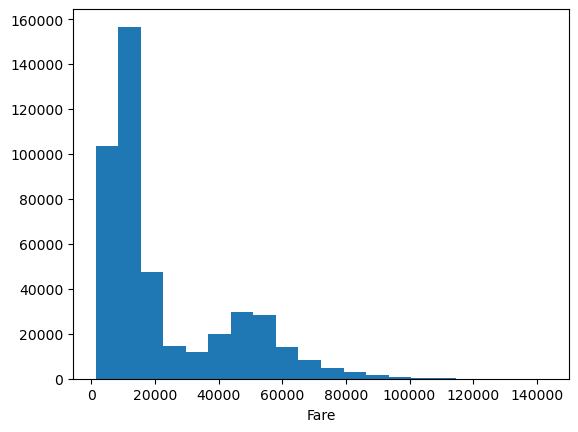

In [16]:
#visually check for outliers and how they effect the data
plt.hist(df2['Fare'], bins = 20)
plt.xlabel('Fare')
plt.show()

In [35]:
#Data was downloaded from Kaggle.com and came mostly cleaned. The info that is given by the data shows that most of the data is categorical and of object type while
#only 3 of them were of numerical type (int or float). The data was further digested by breaking down the dates to year, month, and day and putting those into their own
#columns. Then, the data was checked for duplicates; there were a few so those that were detected were dropped from the dataset. To further understand some of the data
#the mean was found for fare, days_left, and duration grouped by destination. This showed that the averages were pretty similar for most destinations. Value_counts() was
#used on some of the categorical features to understand how many and what are the different categories. Finally we checked for outliers, it is understood from this phase
#in the project that the there are many outliers and they are normal and due to variation in prices, this results in a histogram with right-skewed data. Moving forward 
#we will keep an eye on how the outliers effect the data.